In [3]:
import pandas as pd

df = pd.read_csv('datasets/Provisional_COVID-19_Deaths_by_Sex_and_Age.csv')

In [99]:
df['Age Group'].unique()

array(['All Ages', 'Under 1 year', '0-17 years', '1-4 years',
       '5-14 years', '15-24 years', '18-29 years', '25-34 years',
       '30-39 years', '35-44 years', '40-49 years', '45-54 years',
       '50-64 years', '55-64 years', '65-74 years', '75-84 years',
       '85 years and over'], dtype=object)


### check ว่า Age Group ทั้ง 2 แบบเท่ากันไหม

In [122]:
group_by_y_df = df[(df['Group'] == 'By Year') & (df['Sex'] == 'All Sexes') & (df['Age Group'] != 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023)]
pattern1 = group_by_y_df['Age Group'].str.contains('Under 1 year|1-4 years|5-14 years|15-24 years|25-34 years|35-44 years|45-54 years|55-64 years|65-74 years|75-84 years|85 years and over')
pattern2 = group_by_y_df['Age Group'].str.contains('0-17 years|18-29 years|30-39 years|40-49 years|50-64 years|65-74 years|75-84 years|85 years and over')

group_by_y_df[pattern2].groupby('Year')['COVID-19 Deaths'].sum()

Year
2020.0    385666.0
2021.0    463263.0
2022.0    246161.0
Name: COVID-19 Deaths, dtype: float64

In [121]:
group_by_y_df[pattern1].groupby('Year')['COVID-19 Deaths'].sum()

Year
2020.0    385666.0
2021.0    463263.0
2022.0    246161.0
Name: COVID-19 Deaths, dtype: float64

## Univariate Analysis

In [4]:
group_by_m_df = df[(df['Group'] == 'By Month') & (df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023)]
group_by_y_df = df[(df['Group'] == 'By Year') & (df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023)]
group_by_t_df = df[(df['Group'] == 'By Total') & (df['Sex'] == 'All Sexes') & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023)]

In [ ]:
group_by_y_df

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
2754,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,All Ages,385666.0,3390039.0,352010.0,180086.0,8787.0,565226.0,NaN
2805,09/27/2023,01/01/2021,12/31/2021,By Year,2021.0,NaN,United States,All Sexes,All Ages,463263.0,3471767.0,412006.0,259613.0,1092.0,616475.0,NaN
2856,09/27/2023,01/01/2022,12/31/2022,By Year,2022.0,NaN,United States,All Sexes,All Ages,246161.0,3288942.0,267652.0,110393.0,8751.0,411412.0,NaN


In [6]:
import numpy as np
#ค่าเดือนเฉลี่ยของการเสียชีวิตจาก COVID-19 ในแต่ละเดือน
avg_co19_death = np.ceil(group_by_y_df.groupby('Year')['COVID-19 Deaths'].sum() / 12)
print(avg_co19_death)

Year
2020.0    32139.0
2021.0    38606.0
2022.0    20514.0
Name: COVID-19 Deaths, dtype: float64


In [7]:
#ค่าเดือนเฉลี่ยของการเสียชีวิตจาก Pneumonia Deaths ในแต่ละเดือน
avg_pne_death = np.ceil(group_by_y_df.groupby('Year')['Pneumonia Deaths'].sum() / 12)
avg_pne_death

Year
2020.0    29335.0
2021.0    34334.0
2022.0    22305.0
Name: Pneumonia Deaths, dtype: float64

In [8]:
#ค่าเดือนเฉลี่ยของการเสียชีวิตจาก Influenza Deaths ในแต่ละเดือน
avg_inf_death = np.ceil(group_by_y_df.groupby('Year')['Influenza Deaths'].sum() / 12)
avg_inf_death

Year
2020.0    733.0
2021.0     91.0
2022.0    730.0
Name: Influenza Deaths, dtype: float64

In [9]:
#ค่าเดือนเฉลี่ยของการเสียชีวิตจาก Total Deaths ในแต่ละเดือน
avg_total_death = np.ceil(group_by_y_df.groupby('Year')['Total Deaths'].sum() / 12)
avg_total_death

Year
2020.0    282504.0
2021.0    289314.0
2022.0    274079.0
Name: Total Deaths, dtype: float64

In [10]:
#ค่าเฉลี่ยของการเสียชีวิตจาก COVID-19 ในแต่ละเดือนคิดเป็นร้อยละของการเสียชีวิตทั้งหมดในแต่ละปี
group_by_y_df.groupby('Year')['COVID-19 Deaths'].sum() / group_by_y_df.groupby('Year')['Total Deaths'].sum() * 100

Year
2020.0    11.376447
2021.0    13.343724
2022.0     7.484504
dtype: float64

In [11]:
#ค่าเฉลี่ยของการเสียชีวิตจาก Pneumonia Deaths ในแต่ละเดือนคิดเป็นร้อยละของการเสียชีวิตทั้งหมดในแต่ละปี
group_by_y_df.groupby('Year')['Pneumonia Deaths'].sum() / group_by_y_df.groupby('Year')['Total Deaths'].sum() * 100

Year
2020.0    10.383656
2021.0    11.867329
2022.0     8.137936
dtype: float64

In [12]:
#ค่าเฉลี่ยของการเสียชีวิตจาก Influenza Deaths ในแต่ละเดือนคิดเป็นร้อยละของการเสียชีวิตทั้งหมดในแต่ละปี
group_by_y_df.groupby('Year')['Influenza Deaths'].sum() / group_by_y_df.groupby('Year')['Total Deaths'].sum() * 100

Year
2020.0    0.259201
2021.0    0.031454
2022.0    0.266073
dtype: float64

## Bi-/Multivariate Analysis

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
group_by_y_df2 = df[(df['Group'] == 'By Year') & (df['Age Group'] == 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023) & (df['Sex'] != 'All Sexes')]

In [ ]:
def plot(data, sex_col, deaths_col):

    # Calculate monthly average deaths
    data = data.reset_index()

    # Plotting the data
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data, x='Year', y=deaths_col, hue=sex_col, palette='viridis')

    # Adding labels and title
    plt.title(f'Monthly Average {deaths_col} by Year and {sex_col}', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel(f'Monthly Average {deaths_col}', fontsize=12)
    plt.legend(title='Sex')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()
   

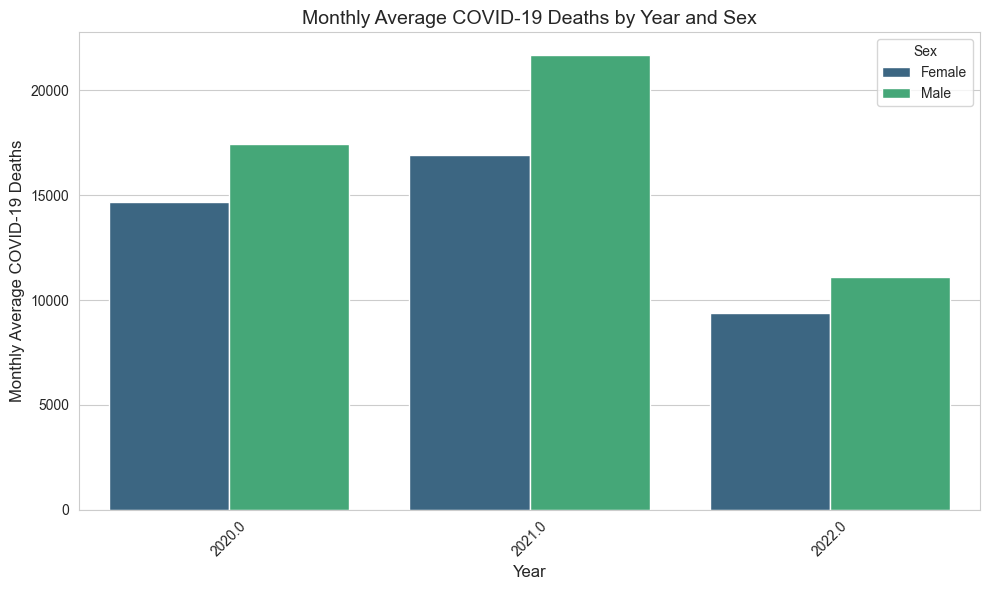

In [59]:
co19_each_sex = np.ceil(group_by_y_df2.groupby(['Year','Sex'])['COVID-19 Deaths'].sum() / 12)
co19_each_sex

plot(co19_each_sex,'Sex','COVID-19 Deaths')


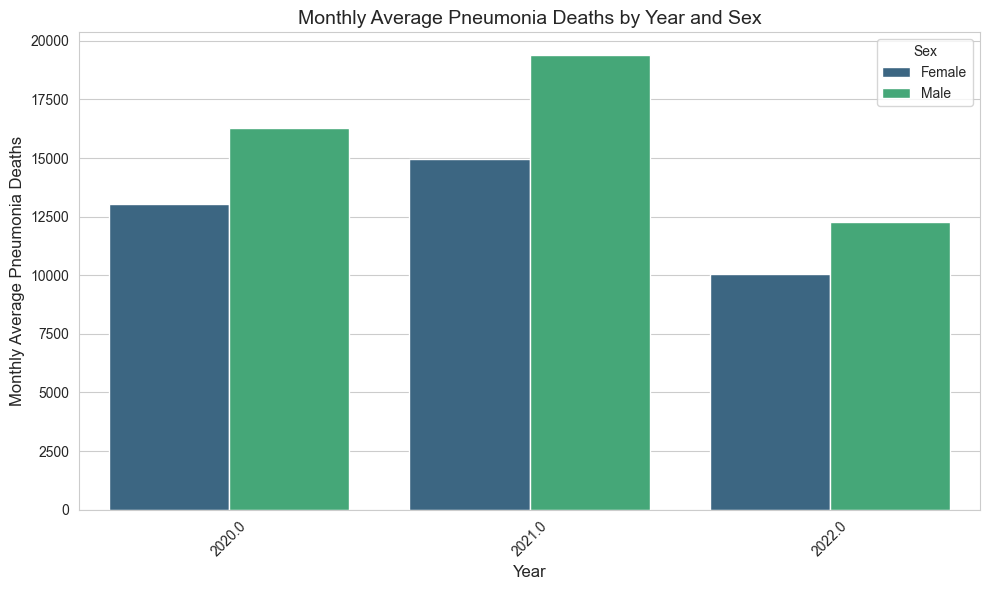

In [61]:
pne_each_sex = np.ceil(group_by_y_df2.groupby(['Year','Sex'])['Pneumonia Deaths'].sum() / 12)
plot(pne_each_sex,'Sex','Pneumonia Deaths')

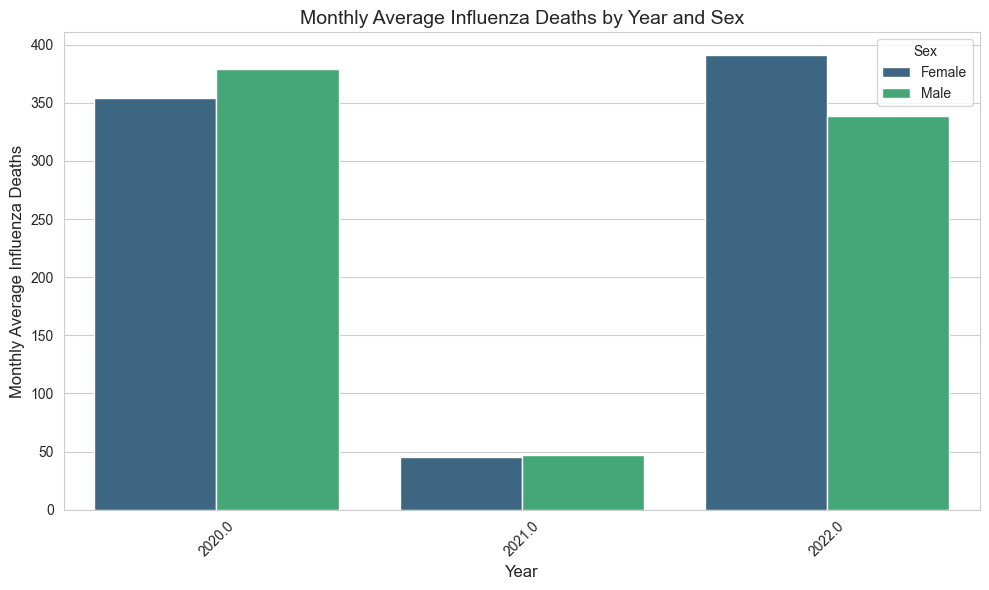

In [76]:
inf_each_sex = np.ceil(group_by_y_df2.groupby(['Year','Sex'])['Influenza Deaths'].sum() / 12)
plot(inf_each_sex,'Sex','Influenza Deaths')

In [75]:
total_each_sex = np.ceil(group_by_y_df2.groupby(['Year','Sex'])['Total Deaths'].sum() / 12)
total_each_sex

Year    Sex   
2020.0  Female    134636.0
        Male      147868.0
2021.0  Female    135690.0
        Male      153624.0
2022.0  Female    130253.0
        Male      143826.0
Name: Total Deaths, dtype: float64

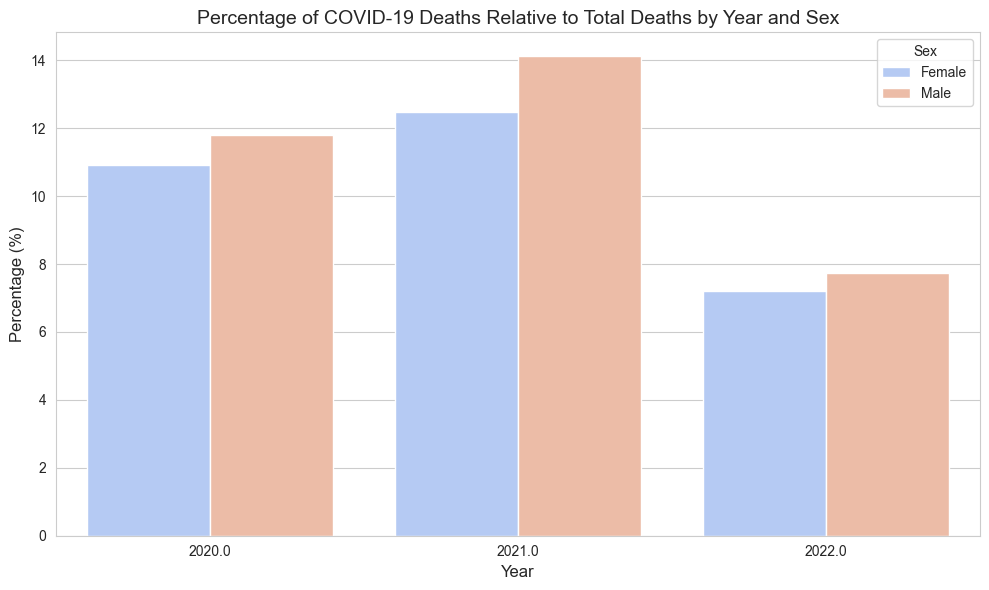

In [90]:
percentage_df = (
    group_by_y_df2.groupby(['Year', 'Sex'])['COVID-19 Deaths'].sum() /
    group_by_y_df2.groupby(['Year', 'Sex'])['Total Deaths'].sum() * 100
).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='Year', y='Percentage', hue='Sex', palette='coolwarm')

plt.title('Percentage of COVID-19 Deaths Relative to Total Deaths by Year and Sex', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Sex')
plt.tight_layout()

plt.show()

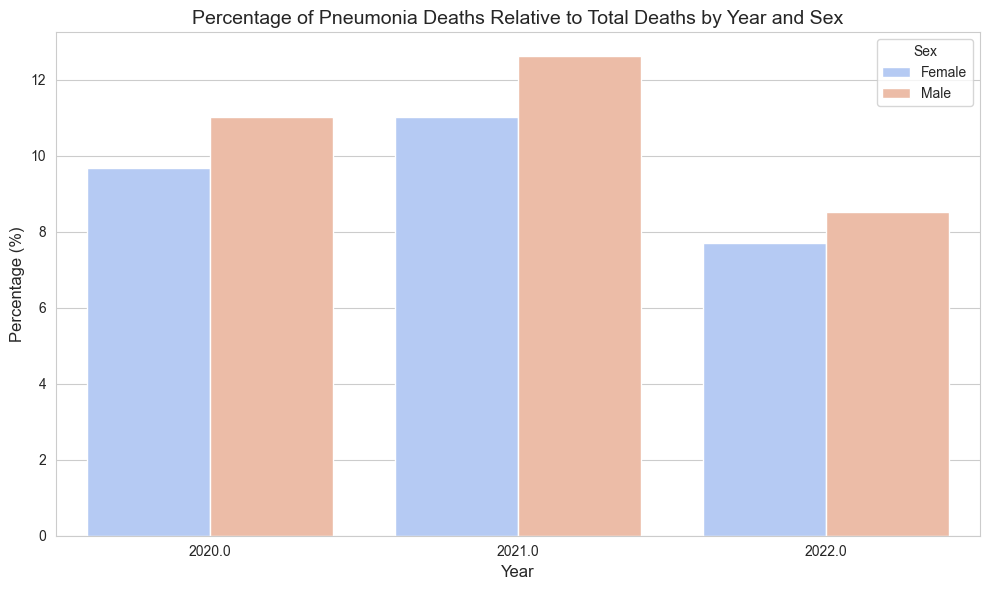

In [91]:
percentage_df = (
  group_by_y_df2.groupby(['Year','Sex'])['Pneumonia Deaths'].sum() / 
  group_by_y_df2.groupby(['Year','Sex'])['Total Deaths'].sum() * 100
  ).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='Year', y='Percentage', hue='Sex', palette='coolwarm')

plt.title('Percentage of Pneumonia Deaths Relative to Total Deaths by Year and Sex', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Sex')
plt.tight_layout()


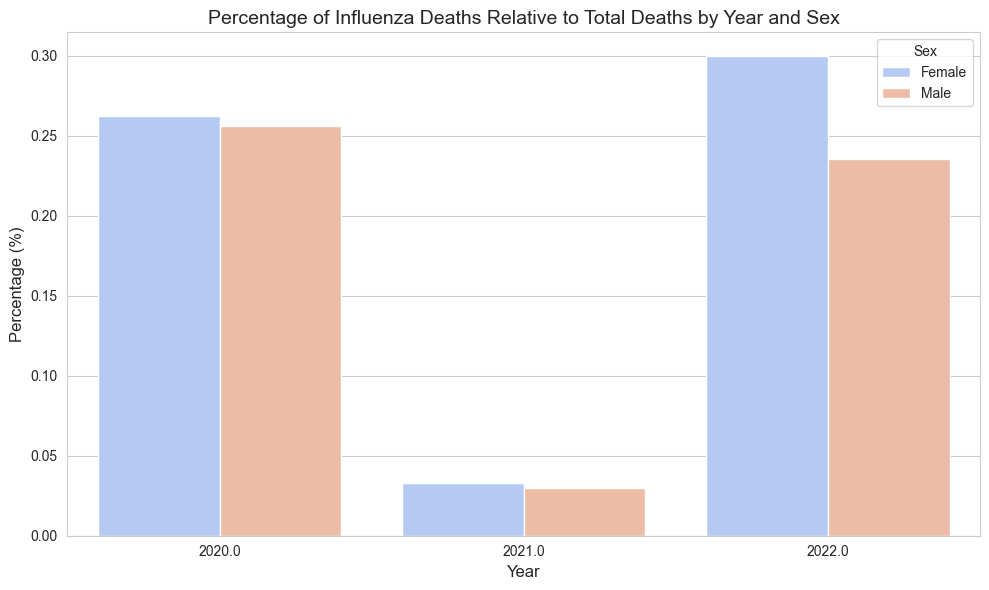

In [92]:
percentage_df = (
  group_by_y_df2.groupby(['Year','Sex'])['Influenza Deaths'].sum() / 
  group_by_y_df2.groupby(['Year','Sex'])['Total Deaths'].sum() * 100
  ).reset_index(name='Percentage')

plt.figure(figsize=(10, 6))
sns.barplot(data=percentage_df, x='Year', y='Percentage', hue='Sex', palette='coolwarm')

plt.title('Percentage of Influenza Deaths Relative to Total Deaths by Year and Sex', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Sex')
plt.tight_layout()

In [152]:
group_by_y_df3 = df[(df['Group'] == 'By Year') & (df['Age Group'] != 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023) & (df['Sex'] == 'All Sexes')]
group_by_y_df3 = group_by_y_df3[pattern1]

In [ ]:
age_group_order = [
    'Under 1 year', 
    '1-4 years', 
    '5-14 years', 
    '15-24 years', 
    '25-34 years', 
    '35-44 years', 
    '45-54 years', 
    '55-64 years', 
    '65-74 years', 
    '75-84 years', 
    '85 years and over'
]

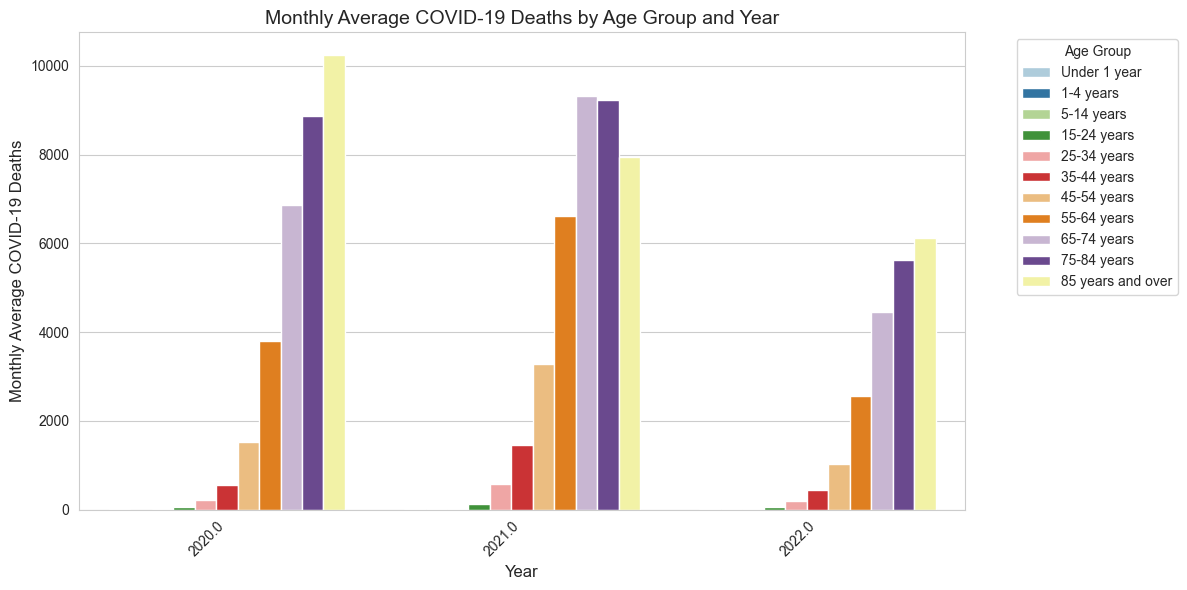

In [147]:
co19_each_age = np.ceil(group_by_y_df3.groupby(['Year','Age Group'])['COVID-19 Deaths'].sum() / 12).reset_index()

# Create a categorical column with custom ordering
co19_each_age['Age Group'] = pd.Categorical(
    co19_each_age['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column
co19_each_age = co19_each_age.sort_values('Age Group')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=co19_each_age, 
    x='Year', 
    y='COVID-19 Deaths', 
    hue='Age Group', 
    palette='Paired'
)

# Customize the plot
plt.title('Monthly Average COVID-19 Deaths by Age Group and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Monthly Average COVID-19 Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

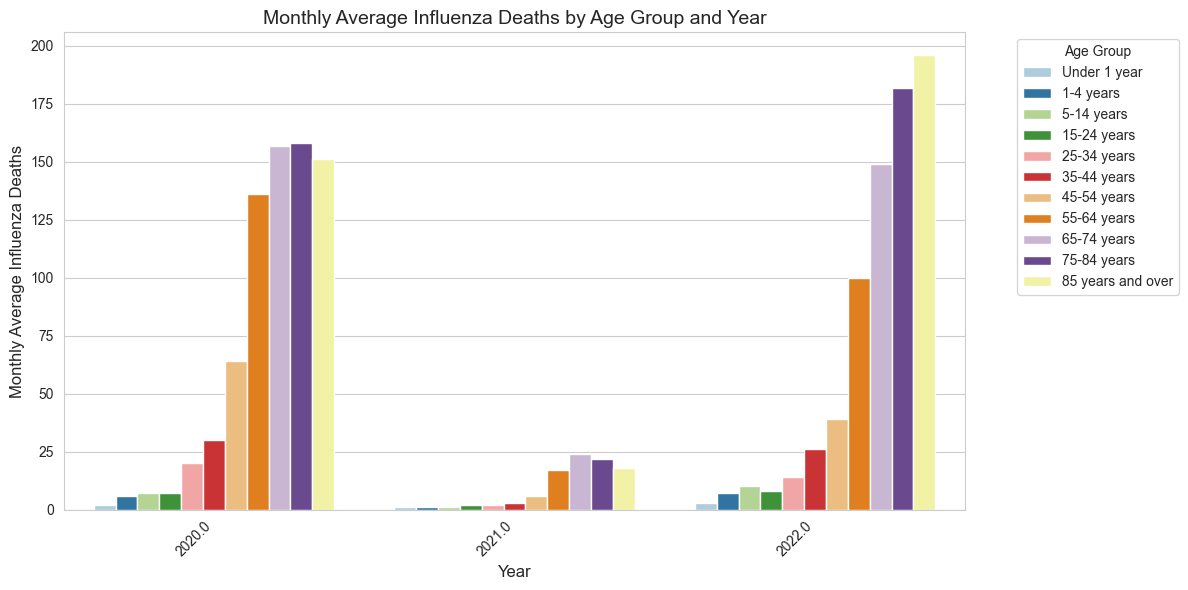

In [149]:
inf_each_age = np.ceil(group_by_y_df3.groupby(['Year','Age Group'])['Influenza Deaths'].sum() / 12).reset_index()

# Create a categorical column with custom ordering
inf_each_age['Age Group'] = pd.Categorical(
    inf_each_age['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column
inf_each_age = inf_each_age.sort_values('Age Group')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=inf_each_age, 
    x='Year', 
    y='Influenza Deaths', 
    hue='Age Group', 
    palette='Paired'
)

# Customize the plot
plt.title('Monthly Average Influenza Deaths by Age Group and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Monthly Average Influenza Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

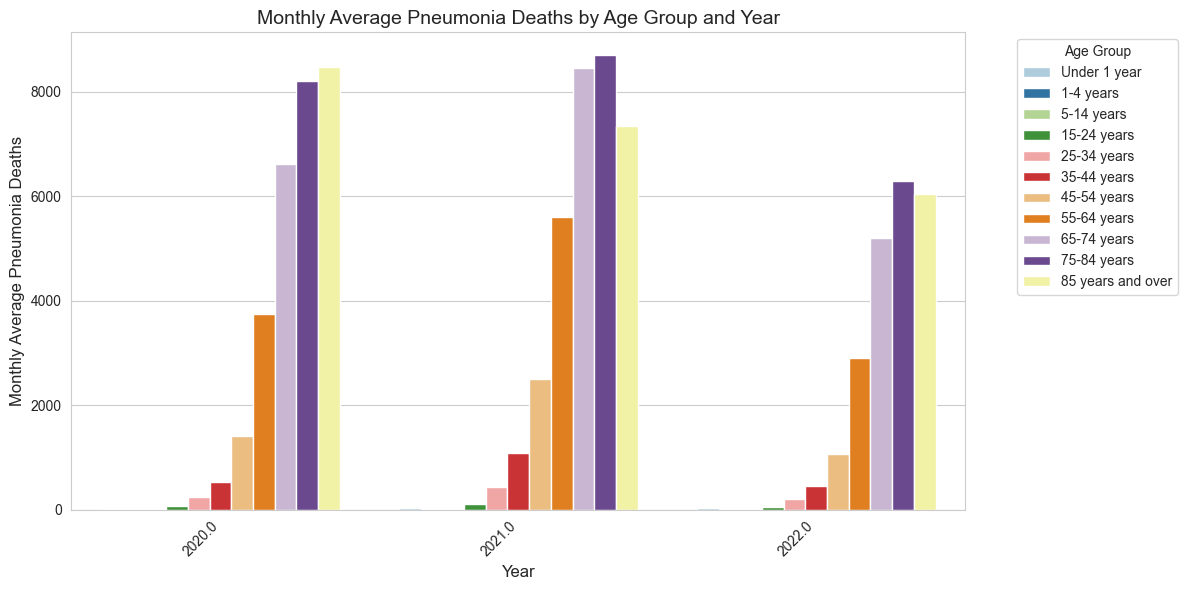

In [150]:
pne_each_age = np.ceil(group_by_y_df3.groupby(['Year','Age Group'])['Pneumonia Deaths'].sum() / 12).reset_index()

# Create a categorical column with custom ordering
pne_each_age['Age Group'] = pd.Categorical(
    pne_each_age['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column
pne_each_age = pne_each_age.sort_values('Age Group')

# Create the plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=pne_each_age, 
    x='Year', 
    y='Pneumonia Deaths', 
    hue='Age Group', 
    palette='Paired'
)

# Customize the plot
plt.title('Monthly Average Pneumonia Deaths by Age Group and Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Monthly Average Pneumonia Deaths', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
group_by_y_df3.head(10)

,Data As Of,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
2755,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,Under 1 year,52.0,19645.0,242.0,9.0,21.0,306.0,NaN
2757,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,1-4 years,25.0,3539.0,134.0,4.0,61.0,216.0,NaN
2758,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,5-14 years,69.0,5644.0,173.0,12.0,76.0,306.0,NaN
2759,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,15-24 years,619.0,36015.0,776.0,224.0,80.0,1246.0,NaN
2761,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,25-34 years,2626.0,73883.0,2797.0,1110.0,230.0,4526.0,NaN
2763,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,35-44 years,6792.0,104988.0,6338.0,3028.0,356.0,10422.0,NaN
2765,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,45-54 years,18343.0,191991.0,16837.0,8966.0,766.0,26866.0,NaN
2767,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,55-64 years,45594.0,442016.0,44976.0,23093.0,1622.0,68863.0,NaN
2768,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,65-74 years,82332.0,675940.0,79518.0,42276.0,1878.0,121170.0,NaN
2769,09/27/2023,01/01/2020,12/31/2020,By Year,2020.0,NaN,United States,All Sexes,75-84 years,106319.0,823038.0,98460.0,51915.0,1894.0,154506.0,NaN


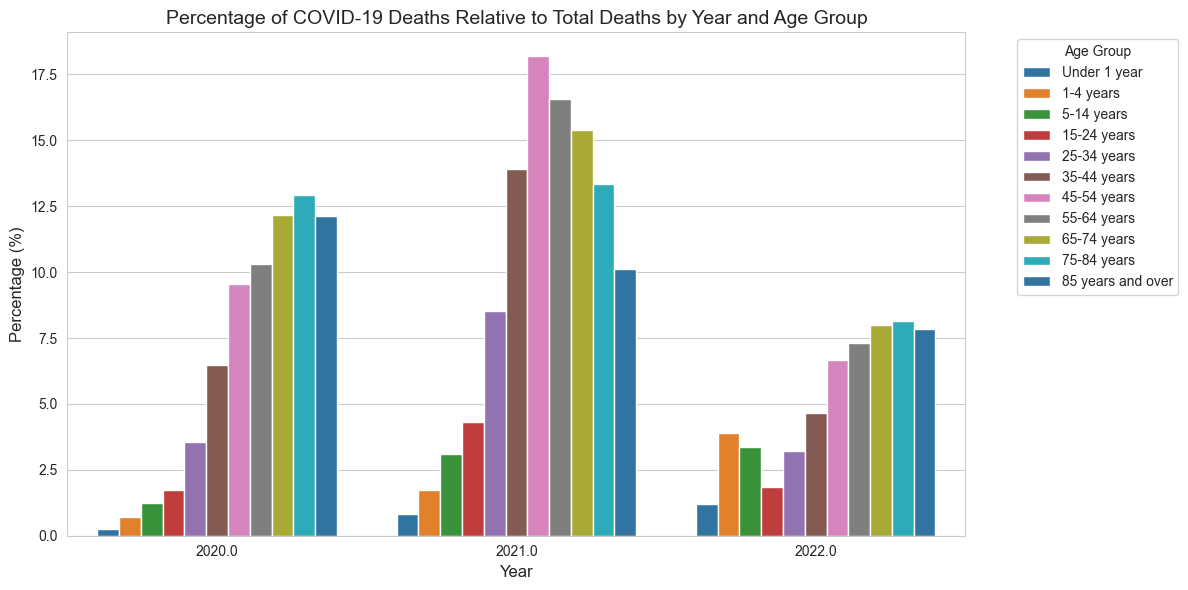

In [153]:

percentage_df = (
    group_by_y_df3.groupby(['Year', 'Age Group'])['COVID-19 Deaths'].sum() /
    group_by_y_df3.groupby(['Year', 'Age Group'])['Total Deaths'].sum() * 100
).reset_index(name='Percentage')

percentage_df['Age Group'] = pd.Categorical(
    percentage_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column
percentage_df = percentage_df.sort_values('Age Group')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_df, x='Year', y='Percentage', hue='Age Group', palette='tab10')

# Adding labels and title
plt.title('Percentage of COVID-19 Deaths Relative to Total Deaths by Year and Age Group', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

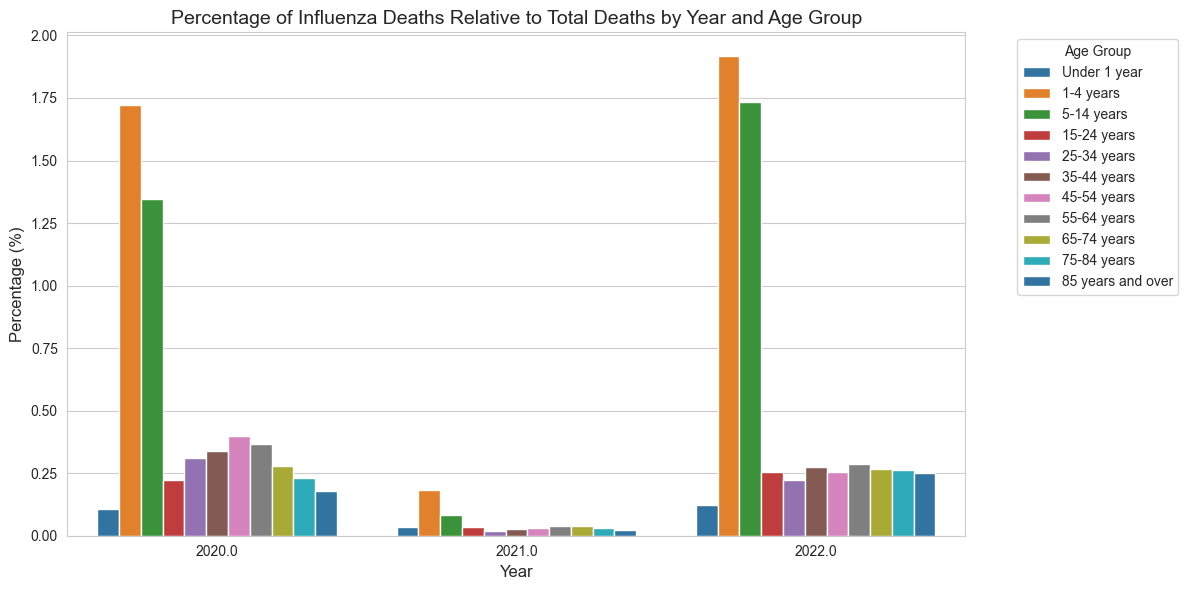

In [155]:

percentage_df = (
    group_by_y_df3.groupby(['Year', 'Age Group'])['Influenza Deaths'].sum() /
    group_by_y_df3.groupby(['Year', 'Age Group'])['Total Deaths'].sum() * 100
).reset_index(name='Percentage')

percentage_df['Age Group'] = pd.Categorical(
    percentage_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Sort the dataframe based on the categorical column
percentage_df = percentage_df.sort_values('Age Group')

# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_df, x='Year', y='Percentage', hue='Age Group', palette='tab10')

# Adding labels and title
plt.title('Percentage of Influenza Deaths Relative to Total Deaths by Year and Age Group', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

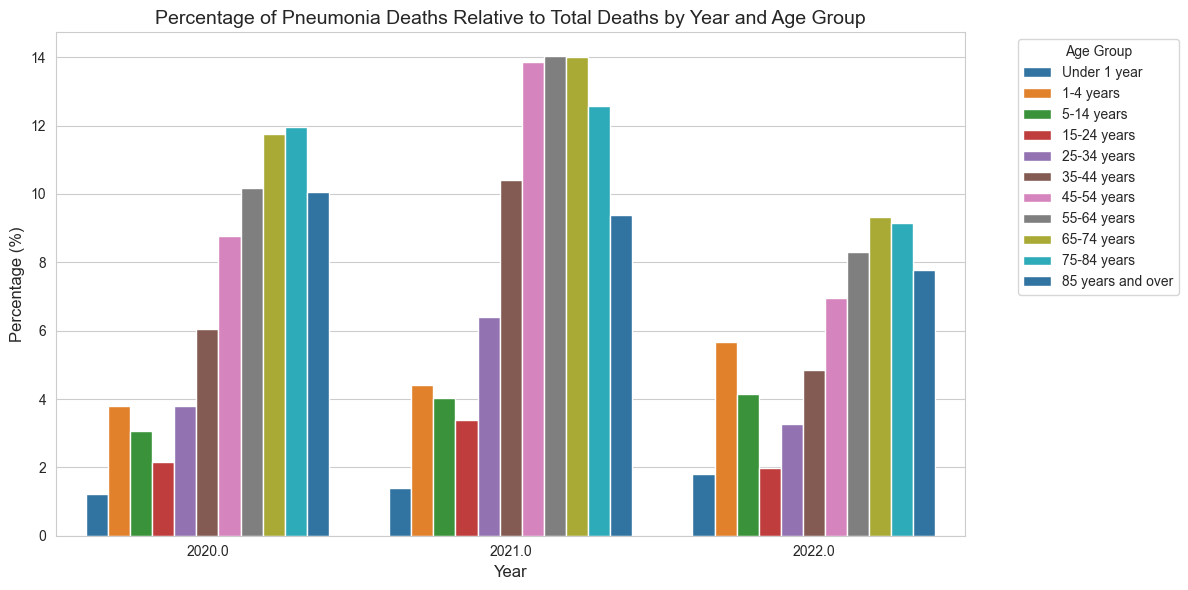

In [156]:
percentage_df = (
    group_by_y_df3.groupby(['Year', 'Age Group'])['Pneumonia Deaths'].sum() /
    group_by_y_df3.groupby(['Year', 'Age Group'])['Total Deaths'].sum() * 100
).reset_index(name='Percentage')

percentage_df['Age Group'] = pd.Categorical(
    percentage_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)


# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=percentage_df, x='Year', y='Percentage', hue='Age Group', palette='tab10')

# Adding labels and title
plt.title('Percentage of Pneumonia Deaths Relative to Total Deaths by Year and Age Group', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
group_by_y_df4 = df[(df['Group'] == 'By Year') & (df['Age Group'] != 'All Ages') & (df['State'] == 'United States') & (df['Year'] != 2023) & (df['Sex'] != 'All Sexes')]
group_by_y_df4 = group_by_y_df4[pattern1]

C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: F

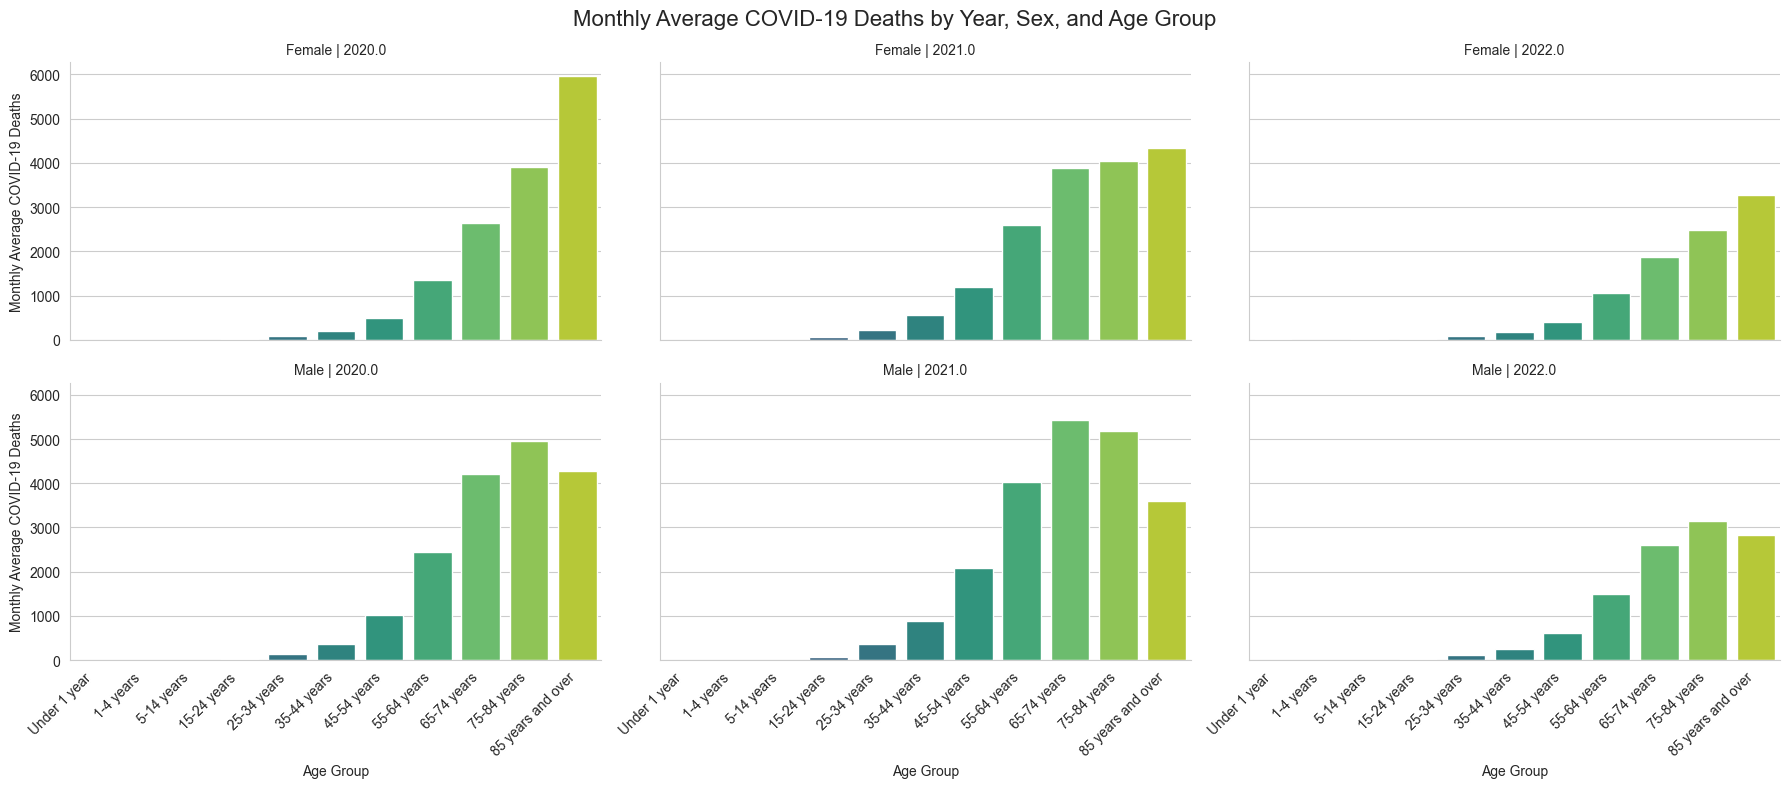

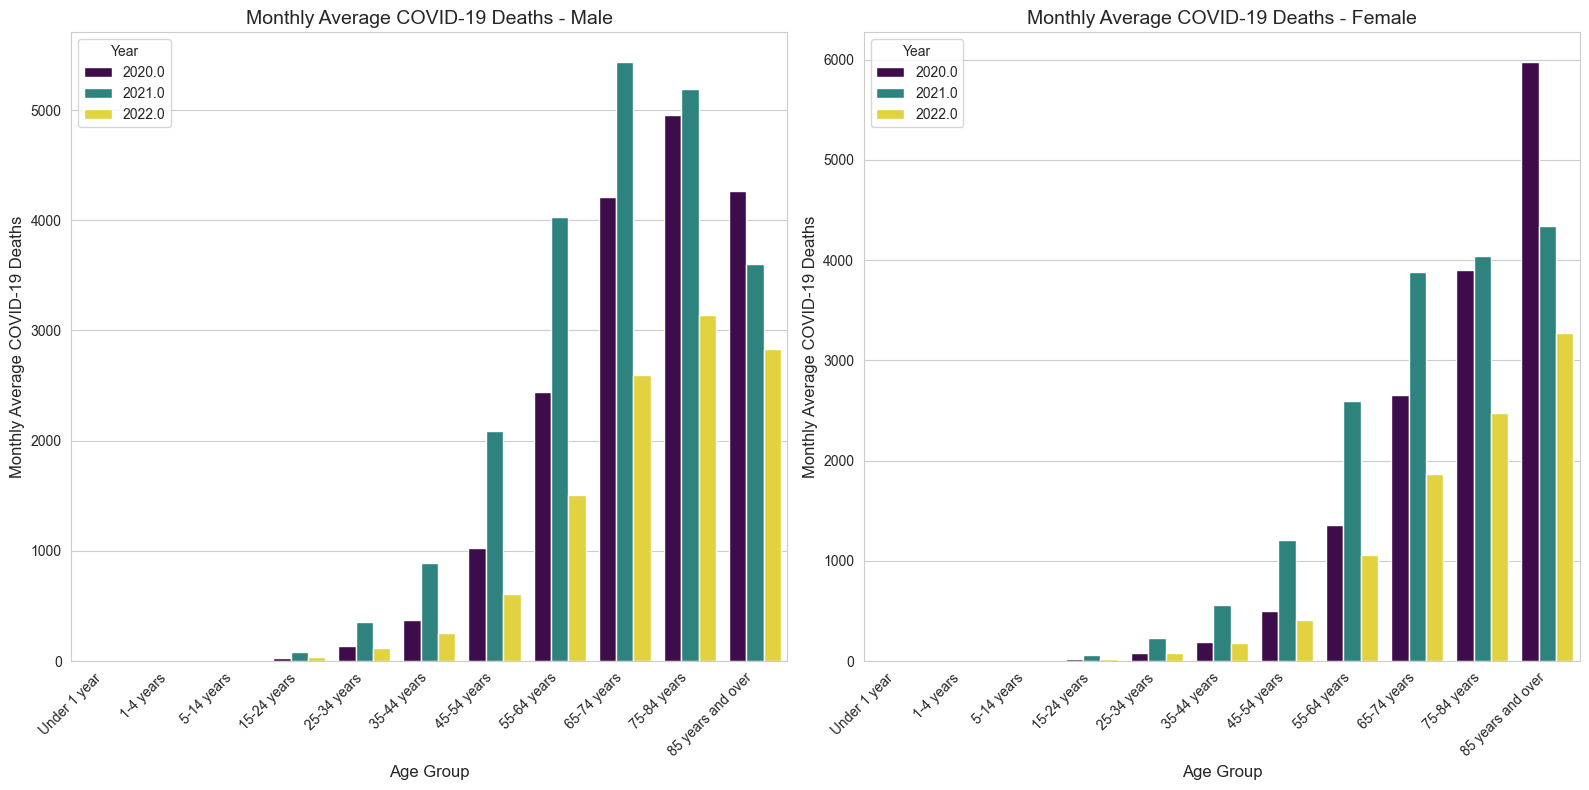

In [161]:
co19_each_sex_age = np.ceil(group_by_y_df4.groupby(['Year','Sex','Age Group'])['COVID-19 Deaths'].sum() / 12).reset_index()

co19_each_sex_age['Age Group'] = pd.Categorical(
    co19_each_sex_age['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Create a facet grid plot to visualize the data by Sex and Year
g = sns.FacetGrid(co19_each_sex_age, col="Year", row="Sex", height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Age Group", y="COVID-19 Deaths", palette="viridis")

# Rotate x-axis labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
# Adjust the layout
g.fig.suptitle('Monthly Average COVID-19 Deaths by Year, Sex, and Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels("Age Group", "Monthly Average COVID-19 Deaths")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

# Alternative: Create separate plots for each sex for better comparison
plt.figure(figsize=(16, 8))

for i, sex in enumerate(['Male', 'Female']):
    plt.subplot(1, 2, i+1)
    
    # Filter data for the current sex
    sex_data = co19_each_sex_age[co19_each_sex_age['Sex'] == sex]
    
    # Create the plot
    sns.barplot(data=sex_data, x='Age Group', y='COVID-19 Deaths', hue='Year', palette='viridis')
    
    # Customize the plot
    plt.title(f'Monthly Average COVID-19 Deaths - {sex}', fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Monthly Average COVID-19 Deaths', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year')

plt.tight_layout()
plt.show()

C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: F

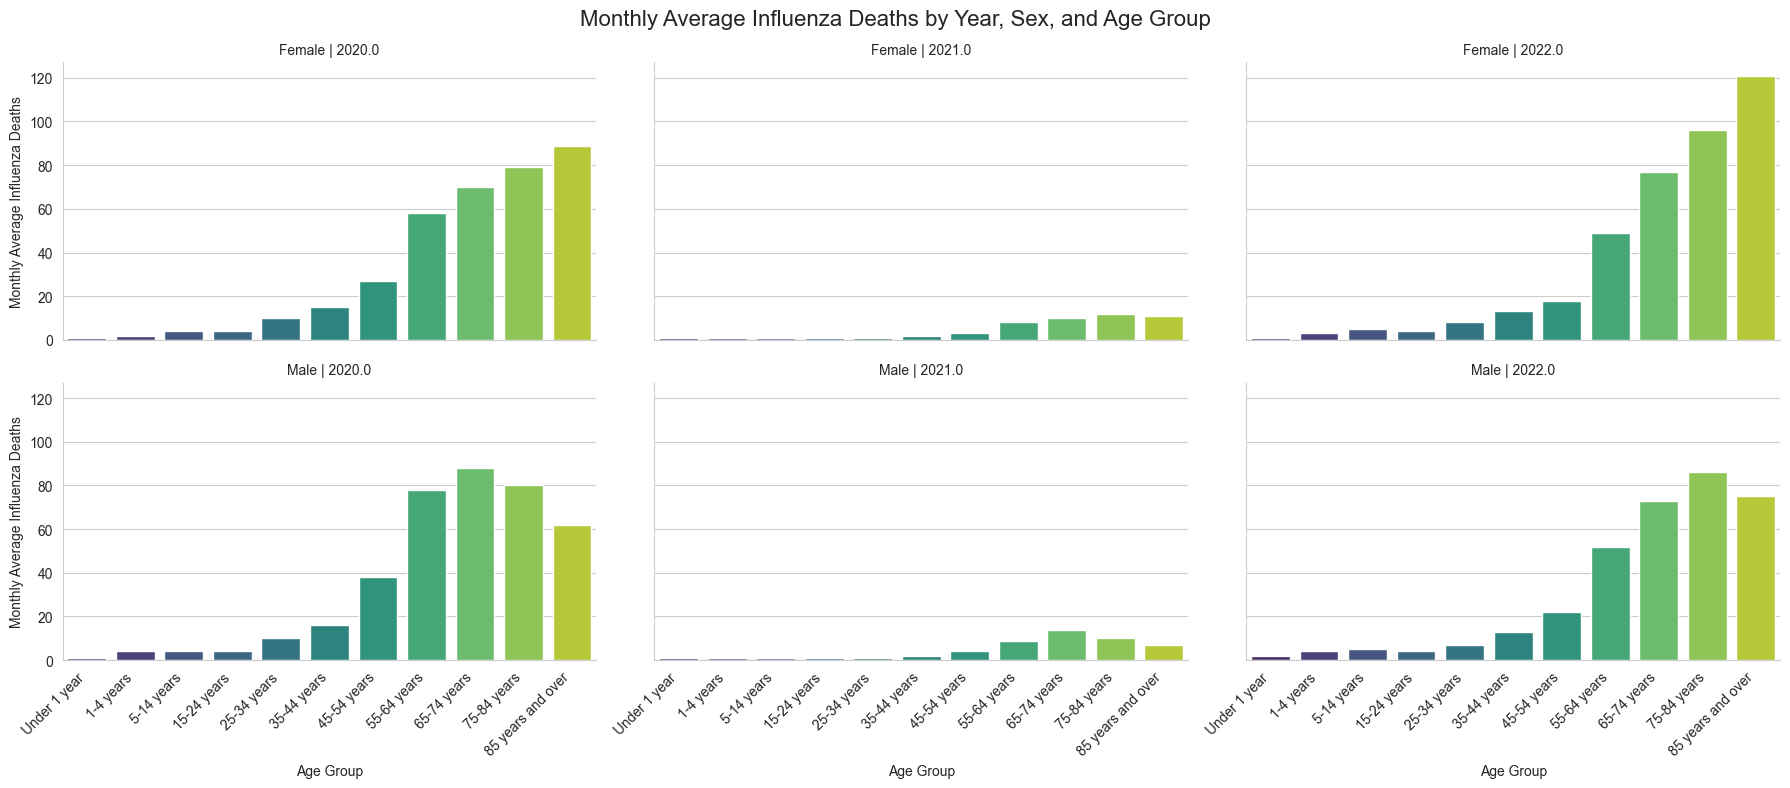

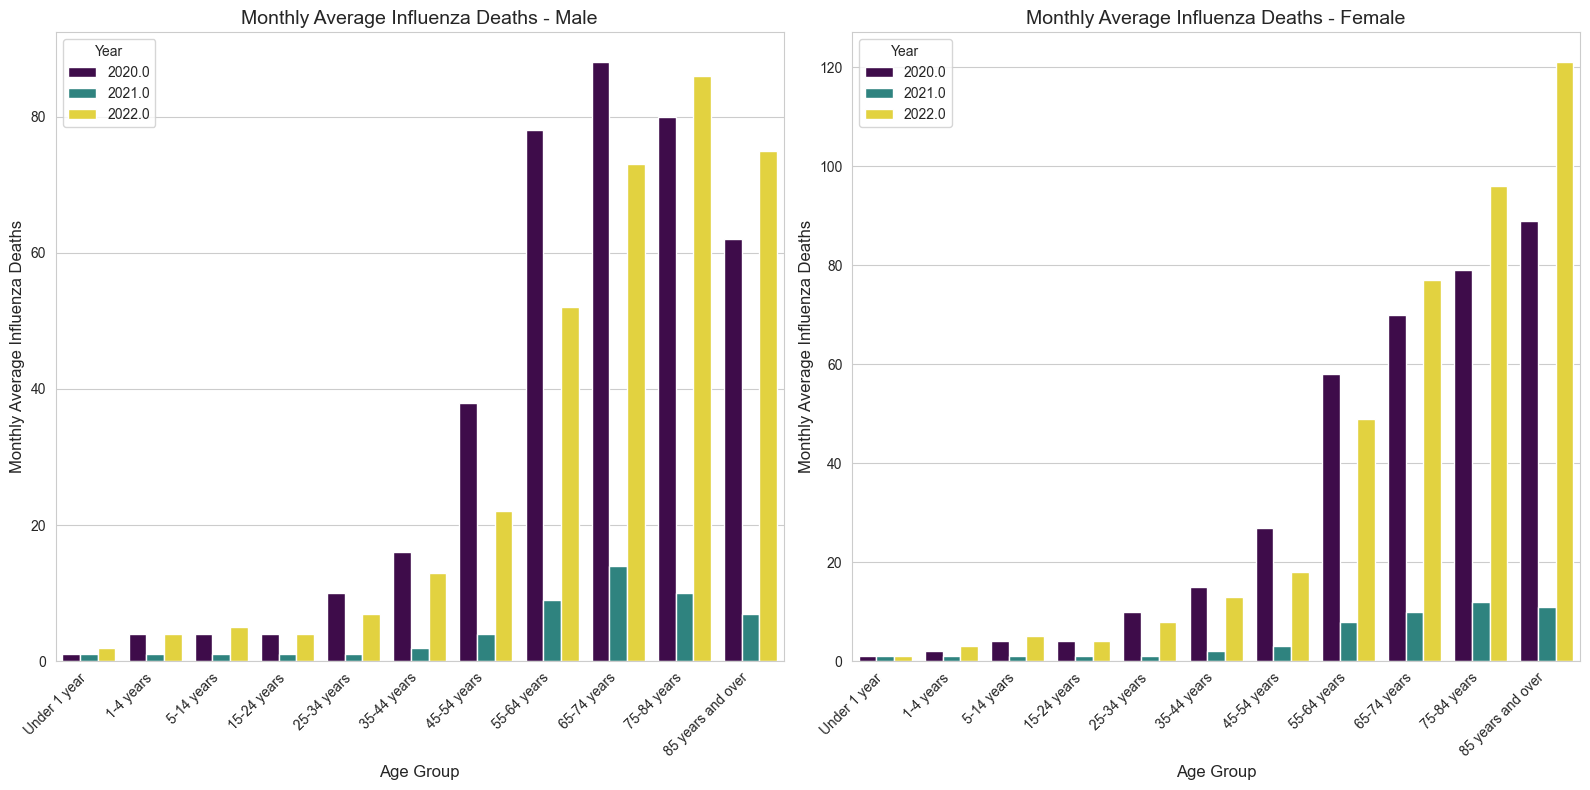

In [162]:
co19_each_sex_age = np.ceil(group_by_y_df4.groupby(['Year','Sex','Age Group'])['Influenza Deaths'].sum() / 12).reset_index()

co19_each_sex_age['Age Group'] = pd.Categorical(
    co19_each_sex_age['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Create a facet grid plot to visualize the data by Sex and Year
g = sns.FacetGrid(co19_each_sex_age, col="Year", row="Sex", height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Age Group", y="Influenza Deaths", palette="viridis")

# Rotate x-axis labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
# Adjust the layout
g.fig.suptitle('Monthly Average Influenza Deaths by Year, Sex, and Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels("Age Group", "Monthly Average Influenza Deaths")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

# Alternative: Create separate plots for each sex for better comparison
plt.figure(figsize=(16, 8))

for i, sex in enumerate(['Male', 'Female']):
    plt.subplot(1, 2, i+1)
    
    # Filter data for the current sex
    sex_data = co19_each_sex_age[co19_each_sex_age['Sex'] == sex]
    
    # Create the plot
    sns.barplot(data=sex_data, x='Age Group', y='Influenza Deaths', hue='Year', palette='viridis')
    
    # Customize the plot
    plt.title(f'Monthly Average Influenza Deaths - {sex}', fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Monthly Average Influenza Deaths', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year')

plt.tight_layout()
plt.show()

C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: F

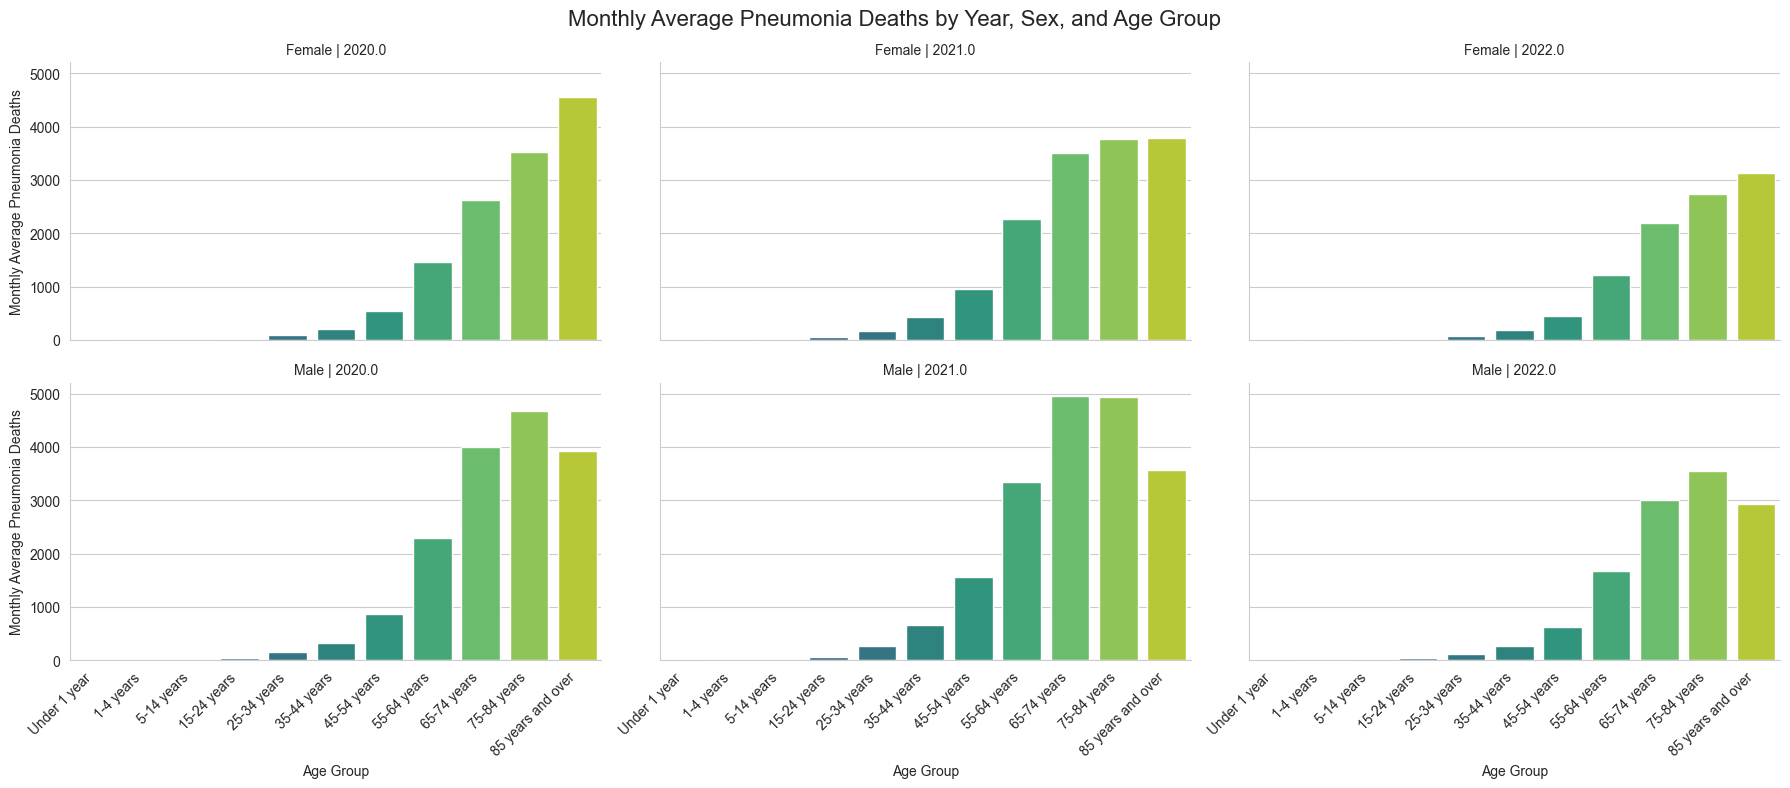

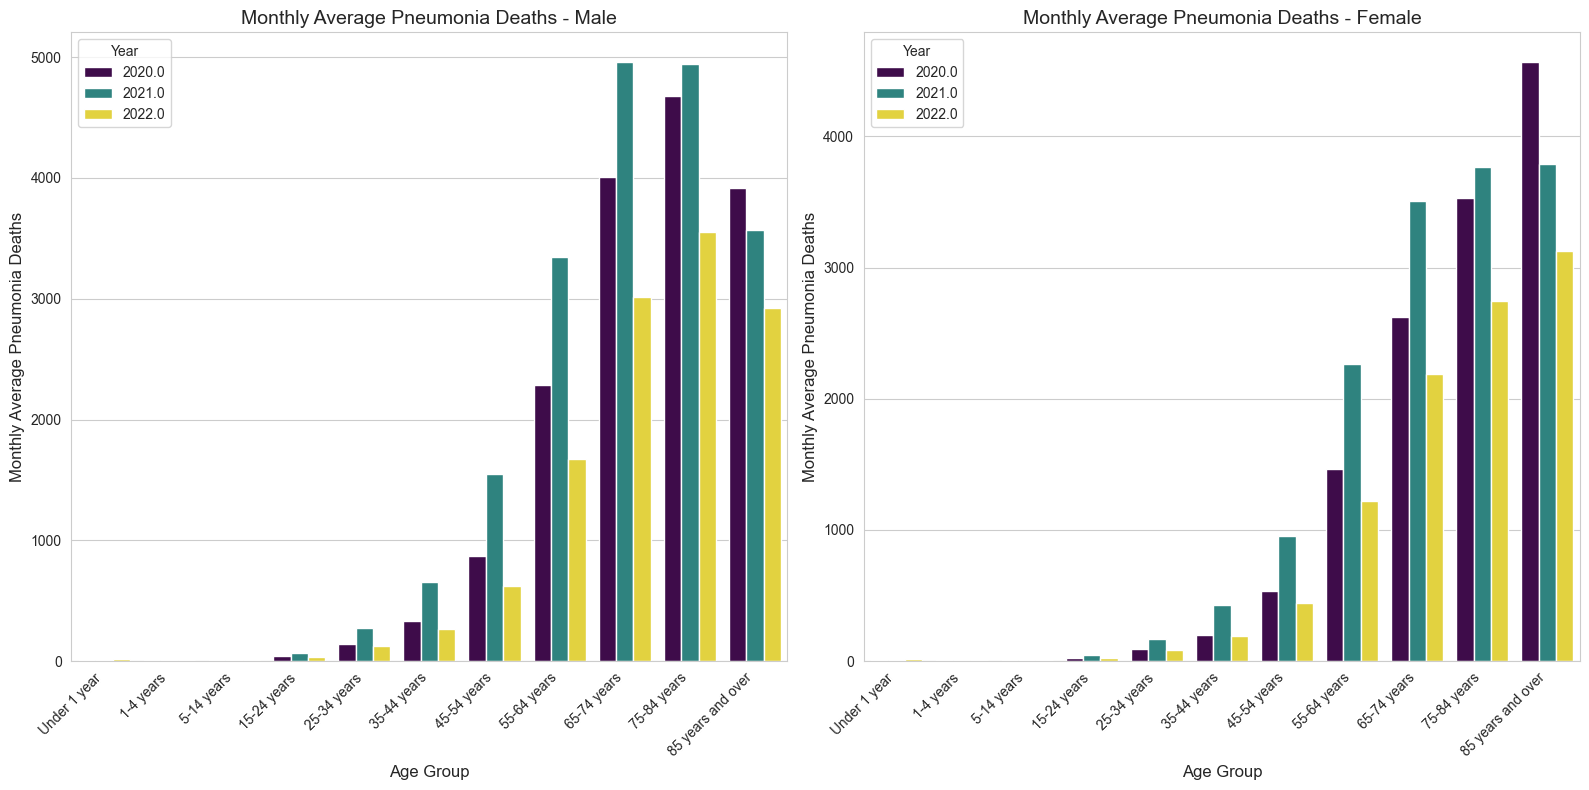

In [163]:
co19_each_sex_age = np.ceil(group_by_y_df4.groupby(['Year','Sex','Age Group'])['Pneumonia Deaths'].sum() / 12).reset_index()

co19_each_sex_age['Age Group'] = pd.Categorical(
    co19_each_sex_age['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Create a facet grid plot to visualize the data by Sex and Year
g = sns.FacetGrid(co19_each_sex_age, col="Year", row="Sex", height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Age Group", y="Pneumonia Deaths", palette="viridis")

# Rotate x-axis labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    
# Adjust the layout
g.fig.suptitle('Monthly Average Pneumonia Deaths by Year, Sex, and Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels("Age Group", "Monthly Average Pneumonia Deaths")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

# Alternative: Create separate plots for each sex for better comparison
plt.figure(figsize=(16, 8))

for i, sex in enumerate(['Male', 'Female']):
    plt.subplot(1, 2, i+1)
    
    # Filter data for the current sex
    sex_data = co19_each_sex_age[co19_each_sex_age['Sex'] == sex]
    
    # Create the plot
    sns.barplot(data=sex_data, x='Age Group', y='Pneumonia Deaths', hue='Year', palette='viridis')
    
    # Customize the plot
    plt.title(f'Monthly Average Pneumonia Deaths - {sex}', fontsize=14)
    plt.xlabel('Age Group', fontsize=12)
    plt.ylabel('Monthly Average Pneumonia Deaths', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Year')

plt.tight_layout()
plt.show()

C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: F

<Figure size 1600x1000 with 0 Axes>

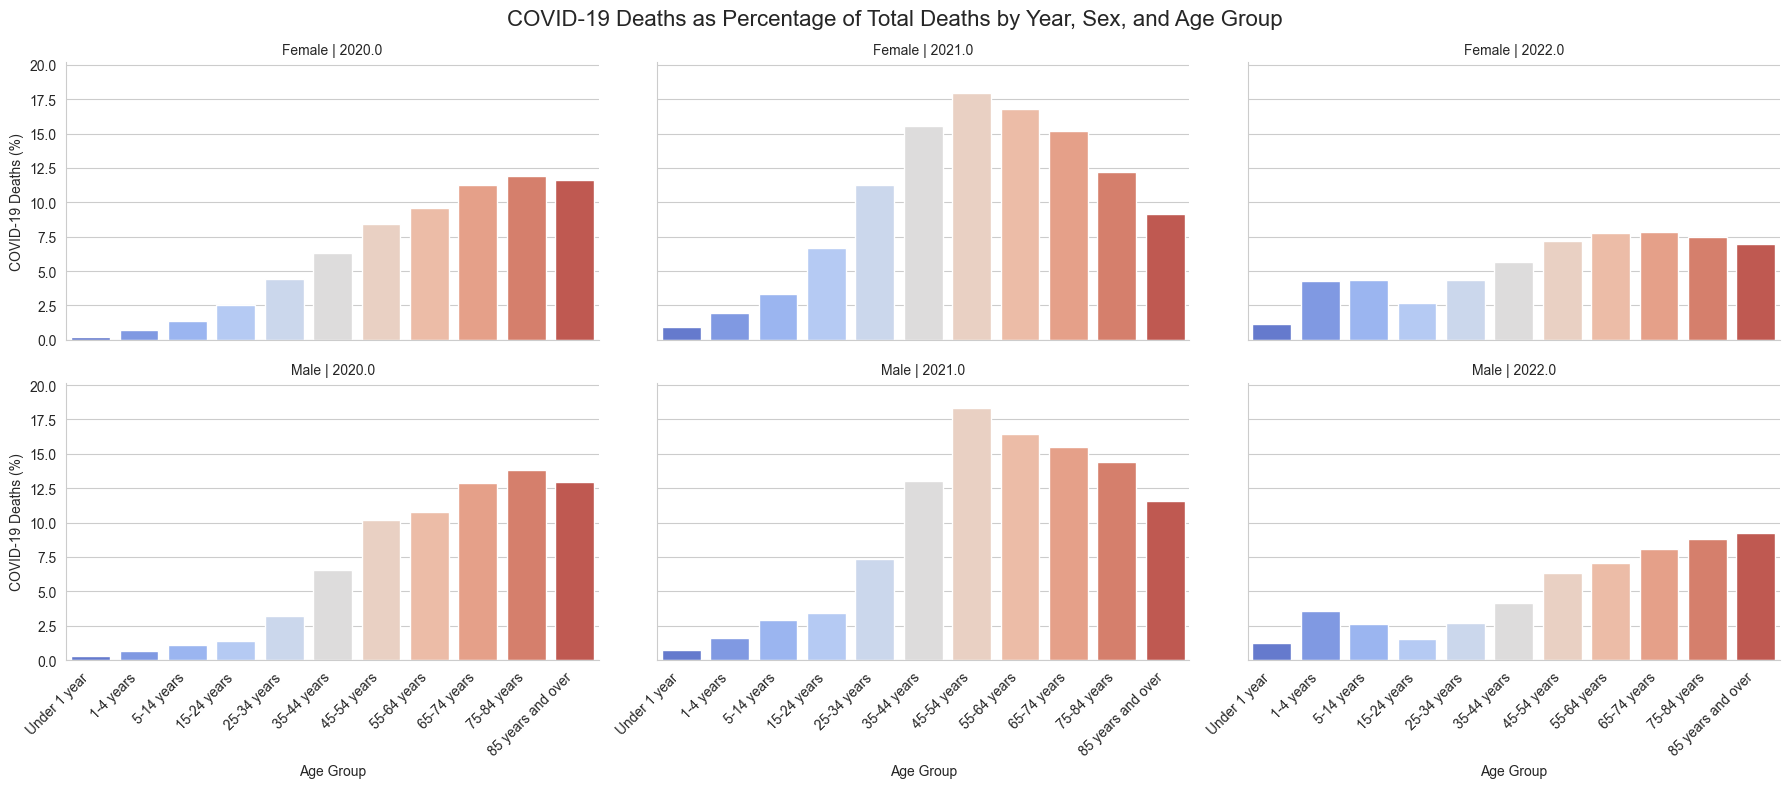

C:\Users\tun12\AppData\Local\Temp\ipykernel_29916\3130597119.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = covid_percentage_df.pivot_table(


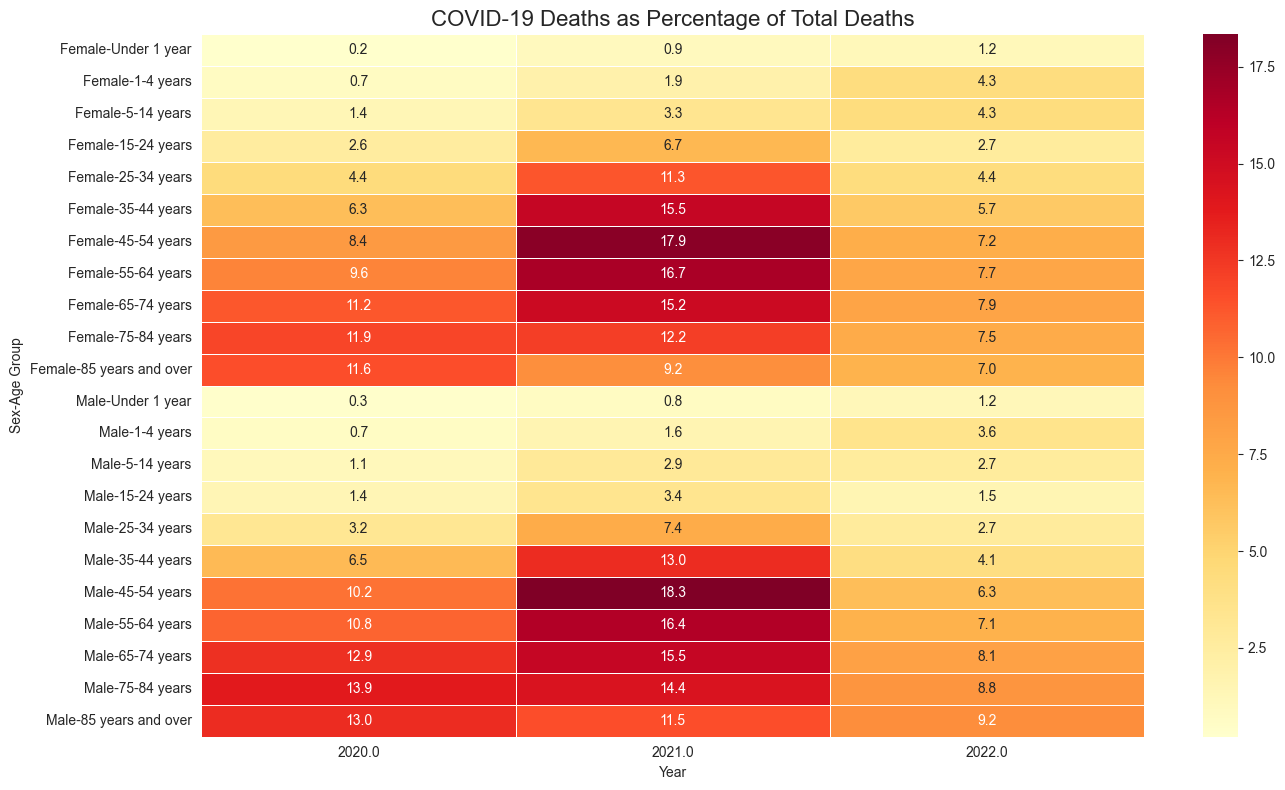

In [164]:
covid_percentage = (group_by_y_df4.groupby(['Year','Sex','Age Group'])['COVID-19 Deaths'].sum() / 
                    group_by_y_df4.groupby(['Year','Sex','Age Group'])['Total Deaths'].sum() * 100)

# Reset the index to convert the multi-index to columns
covid_percentage_df = covid_percentage.reset_index()
covid_percentage_df.rename(columns={0: 'COVID_Percentage'}, inplace=True)

# Create a categorical column with custom ordering
covid_percentage_df['Age Group'] = pd.Categorical(
    covid_percentage_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Create a facet grid plot to visualize the data by Sex and Year
plt.figure(figsize=(16, 10))
g = sns.FacetGrid(covid_percentage_df, col="Year", row="Sex", height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Age Group", y="COVID_Percentage", palette="coolwarm")

# Rotate x-axis labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylim(0, covid_percentage_df['COVID_Percentage'].max() * 1.1)  # Set consistent y-axis with some headroom

# Adjust the layout
g.fig.suptitle('COVID-19 Deaths as Percentage of Total Deaths by Year, Sex, and Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels("Age Group", "COVID-19 Deaths (%)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

# Alternative: Heatmap visualization for better pattern recognition
plt.figure(figsize=(14, 8))

# Reshape the data for the heatmap
heatmap_data = covid_percentage_df.pivot_table(
    index=['Sex', 'Age Group'], 
    columns='Year', 
    values='COVID_Percentage'
)

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=.5)

plt.title('COVID-19 Deaths as Percentage of Total Deaths', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: F

<Figure size 1600x1000 with 0 Axes>

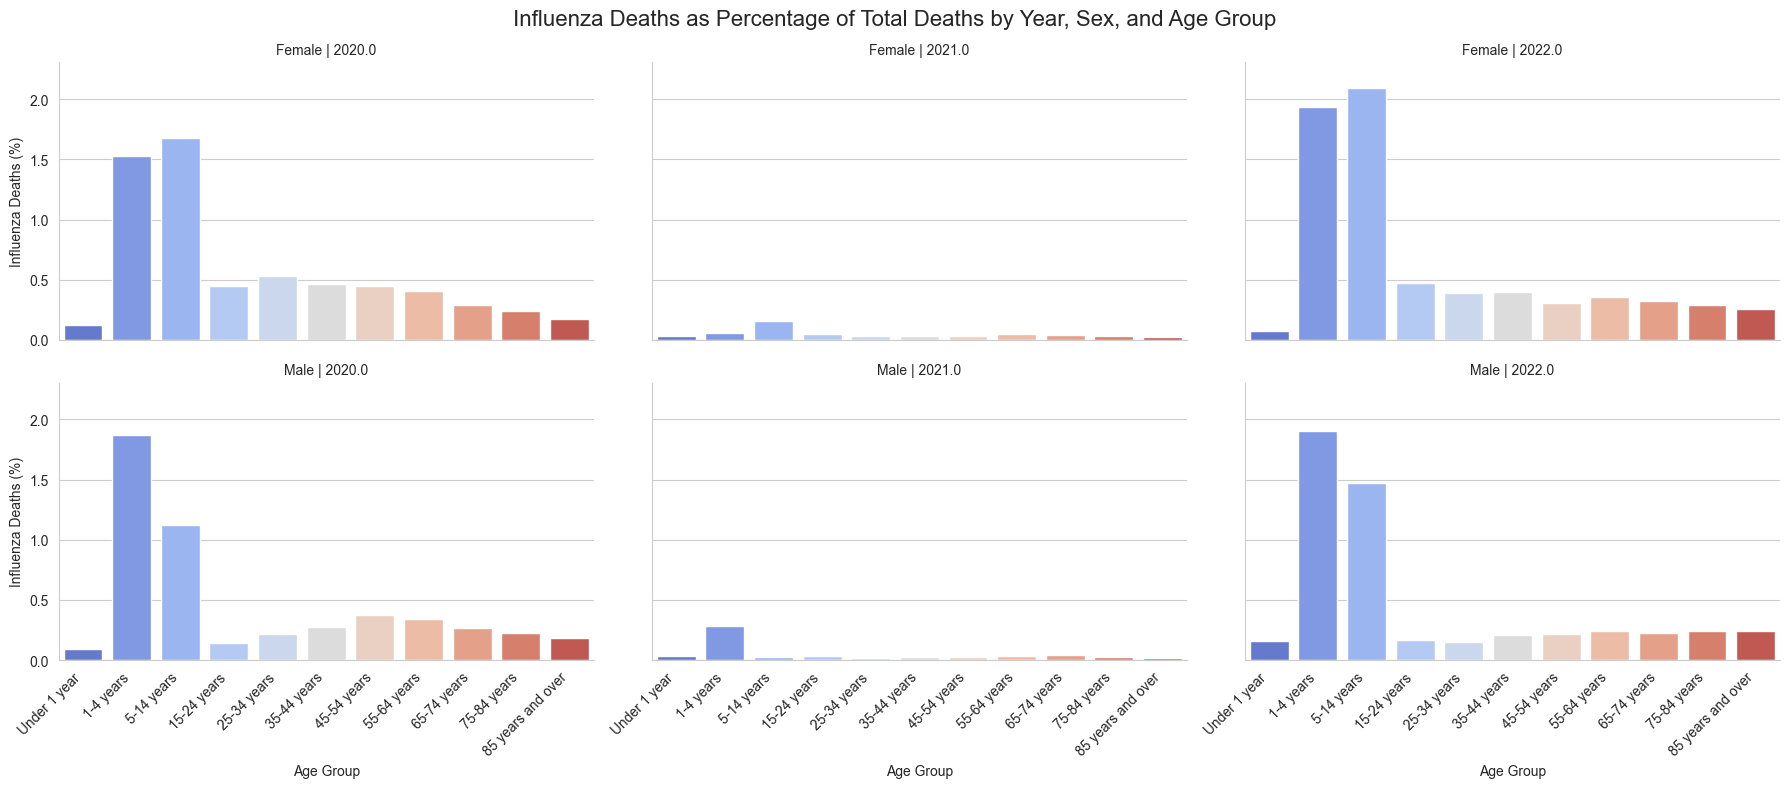

C:\Users\tun12\AppData\Local\Temp\ipykernel_29916\1070058687.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = covid_percentage_df.pivot_table(


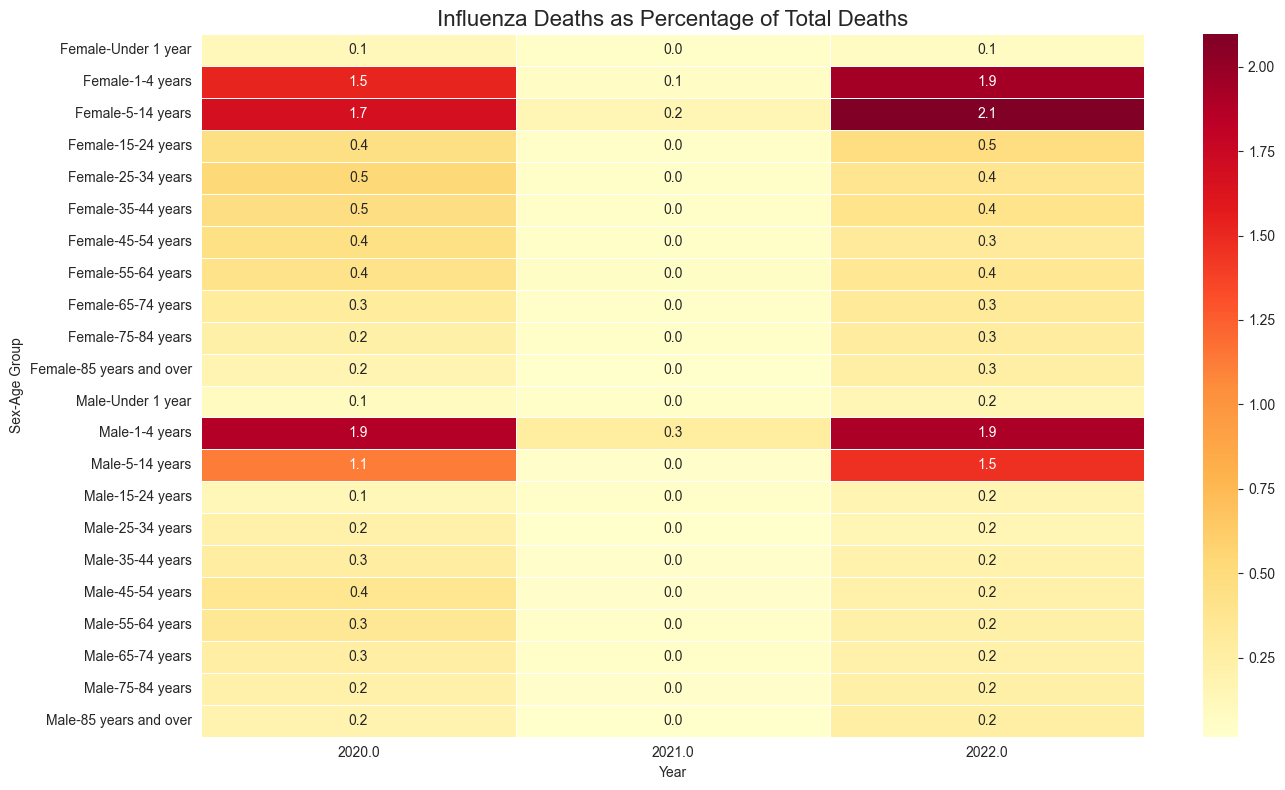

In [166]:
covid_percentage = (group_by_y_df4.groupby(['Year','Sex','Age Group'])['Influenza Deaths'].sum() / 
                    group_by_y_df4.groupby(['Year','Sex','Age Group'])['Total Deaths'].sum() * 100)

# Reset the index to convert the multi-index to columns
covid_percentage_df = covid_percentage.reset_index()
covid_percentage_df.rename(columns={0: 'COVID_Percentage'}, inplace=True)

# Create a categorical column with custom ordering
covid_percentage_df['Age Group'] = pd.Categorical(
    covid_percentage_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Create a facet grid plot to visualize the data by Sex and Year
plt.figure(figsize=(16, 10))
g = sns.FacetGrid(covid_percentage_df, col="Year", row="Sex", height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Age Group", y="COVID_Percentage", palette="coolwarm")

# Rotate x-axis labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylim(0, covid_percentage_df['COVID_Percentage'].max() * 1.1)  # Set consistent y-axis with some headroom

# Adjust the layout
g.fig.suptitle('Influenza Deaths as Percentage of Total Deaths by Year, Sex, and Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels("Age Group", "Influenza Deaths (%)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

# Alternative: Heatmap visualization for better pattern recognition
plt.figure(figsize=(14, 8))

# Reshape the data for the heatmap
heatmap_data = covid_percentage_df.pivot_table(
    index=['Sex', 'Age Group'], 
    columns='Year', 
    values='COVID_Percentage'
)

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=.5)

plt.title('Influenza Deaths as Percentage of Total Deaths', fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\tun12\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: F

<Figure size 1600x1000 with 0 Axes>

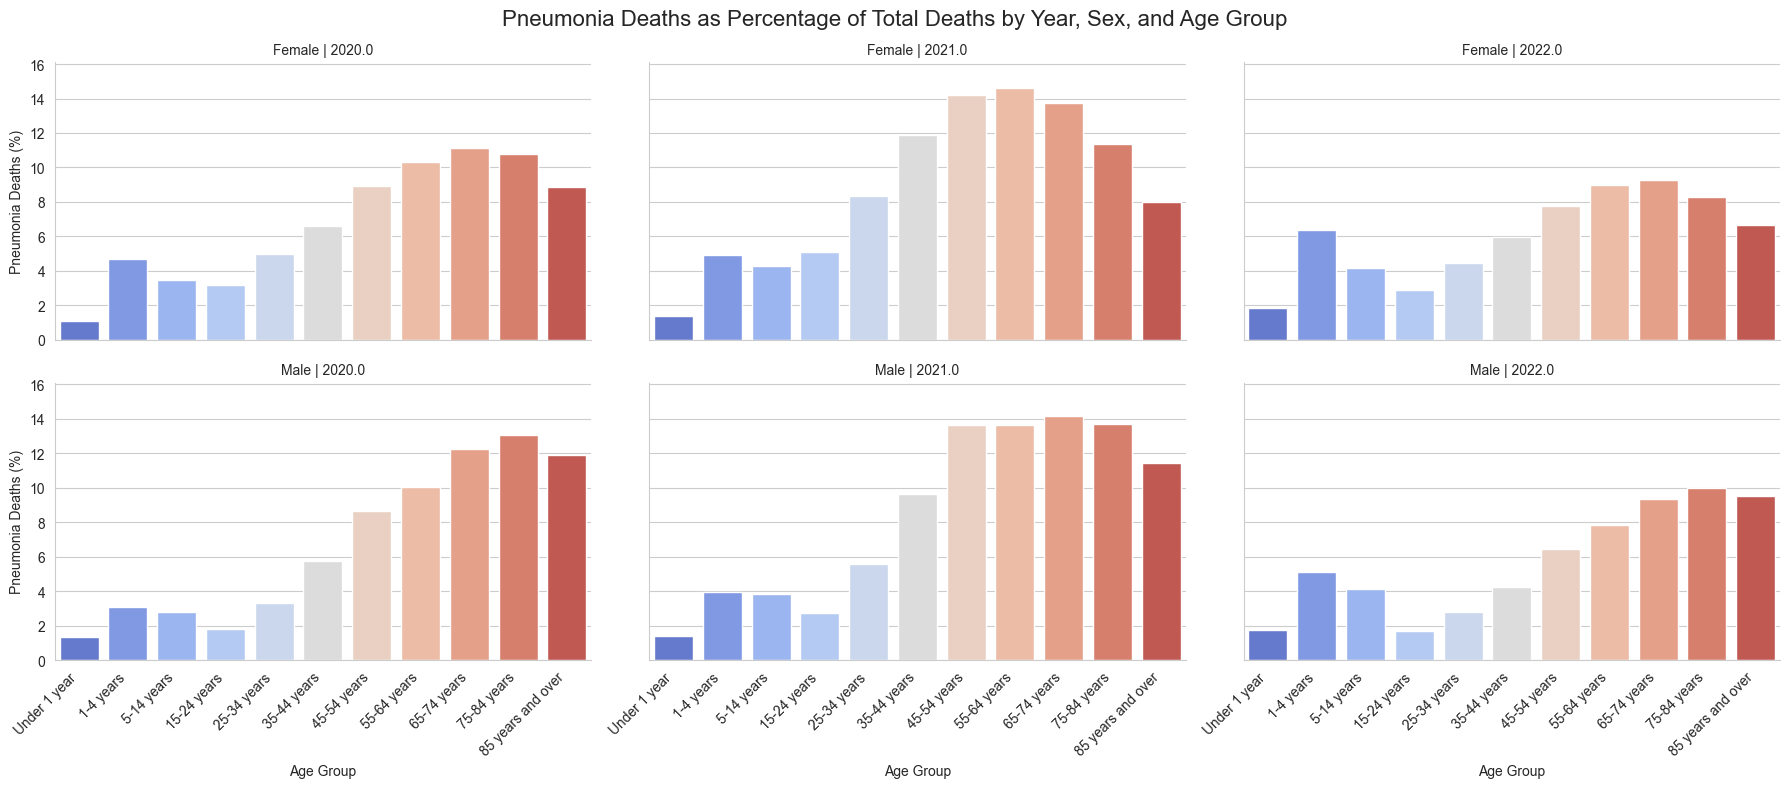

C:\Users\tun12\AppData\Local\Temp\ipykernel_29916\2301466345.py:38: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = covid_percentage_df.pivot_table(


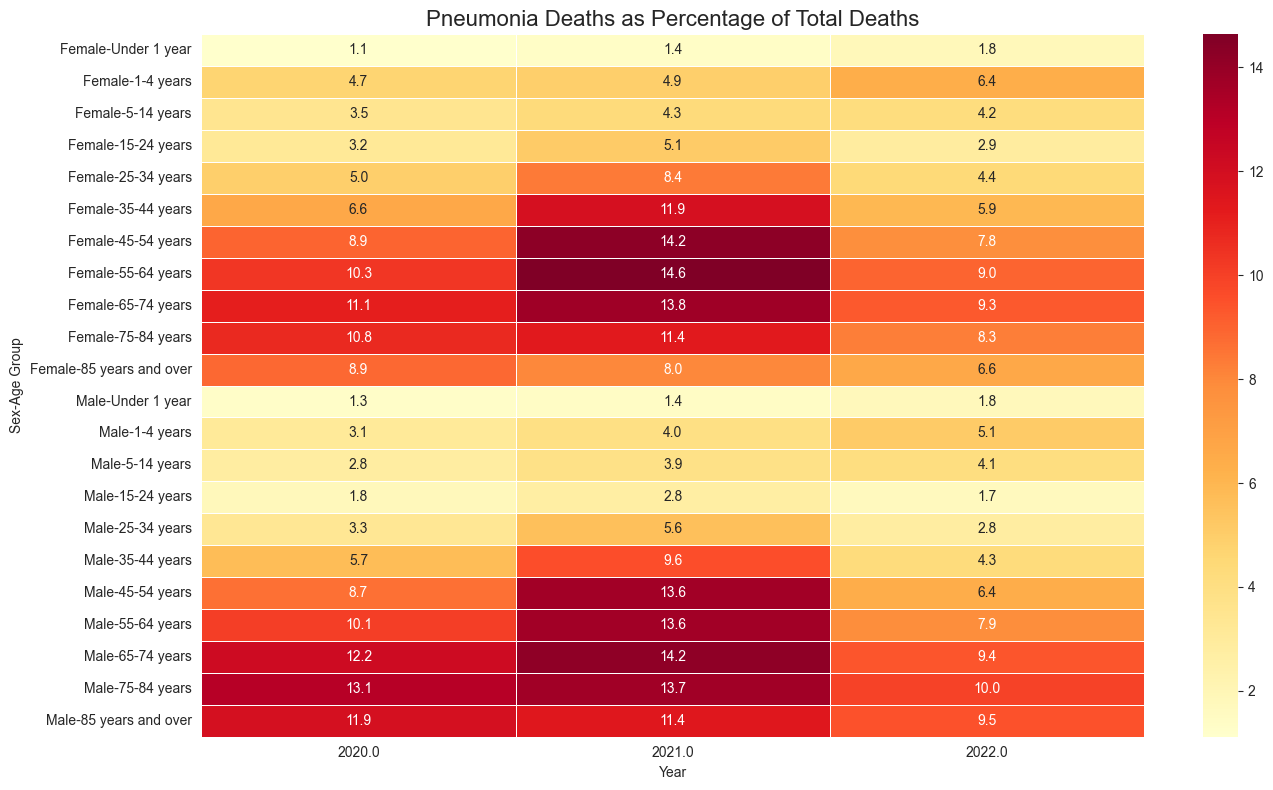

In [ ]:
covid_percentage = (group_by_y_df4.groupby(['Year','Sex','Age Group'])['Pneumonia Deaths'].sum() / 
                    group_by_y_df4.groupby(['Year','Sex','Age Group'])['Total Deaths'].sum() * 100)

# Reset the index to convert the multi-index to columns
covid_percentage_df = covid_percentage.reset_index()
covid_percentage_df.rename(columns={0: 'COVID_Percentage'}, inplace=True)

# Create a categorical column with custom ordering
covid_percentage_df['Age Group'] = pd.Categorical(
    covid_percentage_df['Age Group'], 
    categories=age_group_order, 
    ordered=True
)

# Create a facet grid plot to visualize the data by Sex and Year
plt.figure(figsize=(16, 10))
g = sns.FacetGrid(covid_percentage_df, col="Year", row="Sex", height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Age Group", y="COVID_Percentage", palette="coolwarm")

# Rotate x-axis labels
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
    ax.set_ylim(0, covid_percentage_df['COVID_Percentage'].max() * 1.1)  # Set consistent y-axis with some headroom

# Adjust the layout
g.fig.suptitle('Pneumonia Deaths as Percentage of Total Deaths by Year, Sex, and Age Group', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels("Age Group", "Pneumonia Deaths (%)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.tight_layout()
plt.show()

# Alternative: Heatmap visualization for better pattern recognition
plt.figure(figsize=(14, 8))

# Reshape the data for the heatmap
heatmap_data = covid_percentage_df.pivot_table(
    index=['Sex', 'Age Group'], 
    columns='Year', 
    values='COVID_Percentage'
)

# Create the heatmap
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', linewidths=.5)

plt.title('Pneumonia Deaths as Percentage of Total Deaths', fontsize=16)
plt.tight_layout()
plt.show()